Sample of the dataset:
     MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
66      14.3     34.1       0.0          6.6      10.5         ENE   
247     -0.1     14.2       0.0          1.4       7.0           W   
268     -2.0     11.3       0.2          2.2       5.9         WNW   
170      8.4     16.1       0.0          3.0       4.9          SE   
257     -1.7     13.6       0.0          1.8       5.2         NNW   

     WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
66            39.0          W        NNW           6.0  ...           34   
247           13.0        NaN        WNW           NaN  ...           55   
268           33.0         SE        WNW           2.0  ...           50   
170           35.0         SE        ESE          13.0  ...           51   
257           28.0        NaN        NNW           NaN  ...           46   

     Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
66        1006.6       1003.

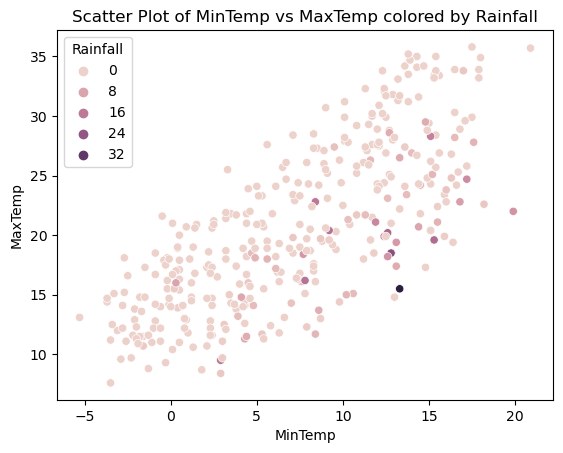

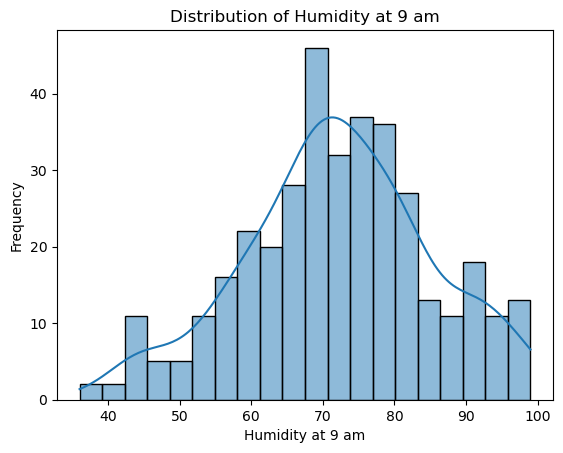

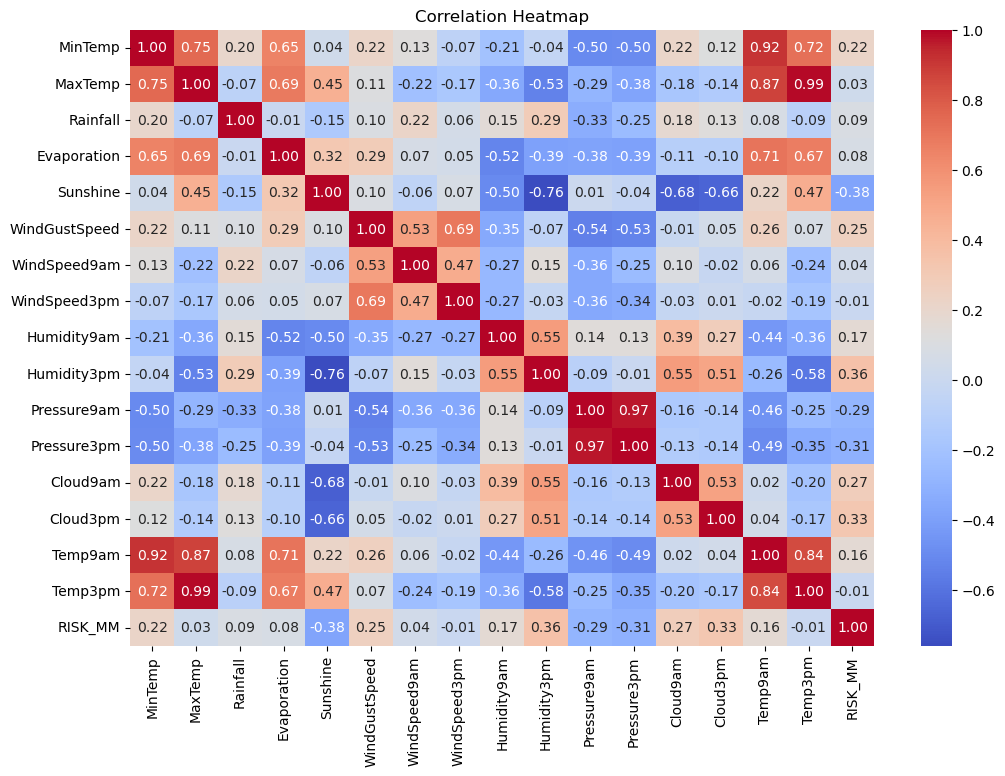

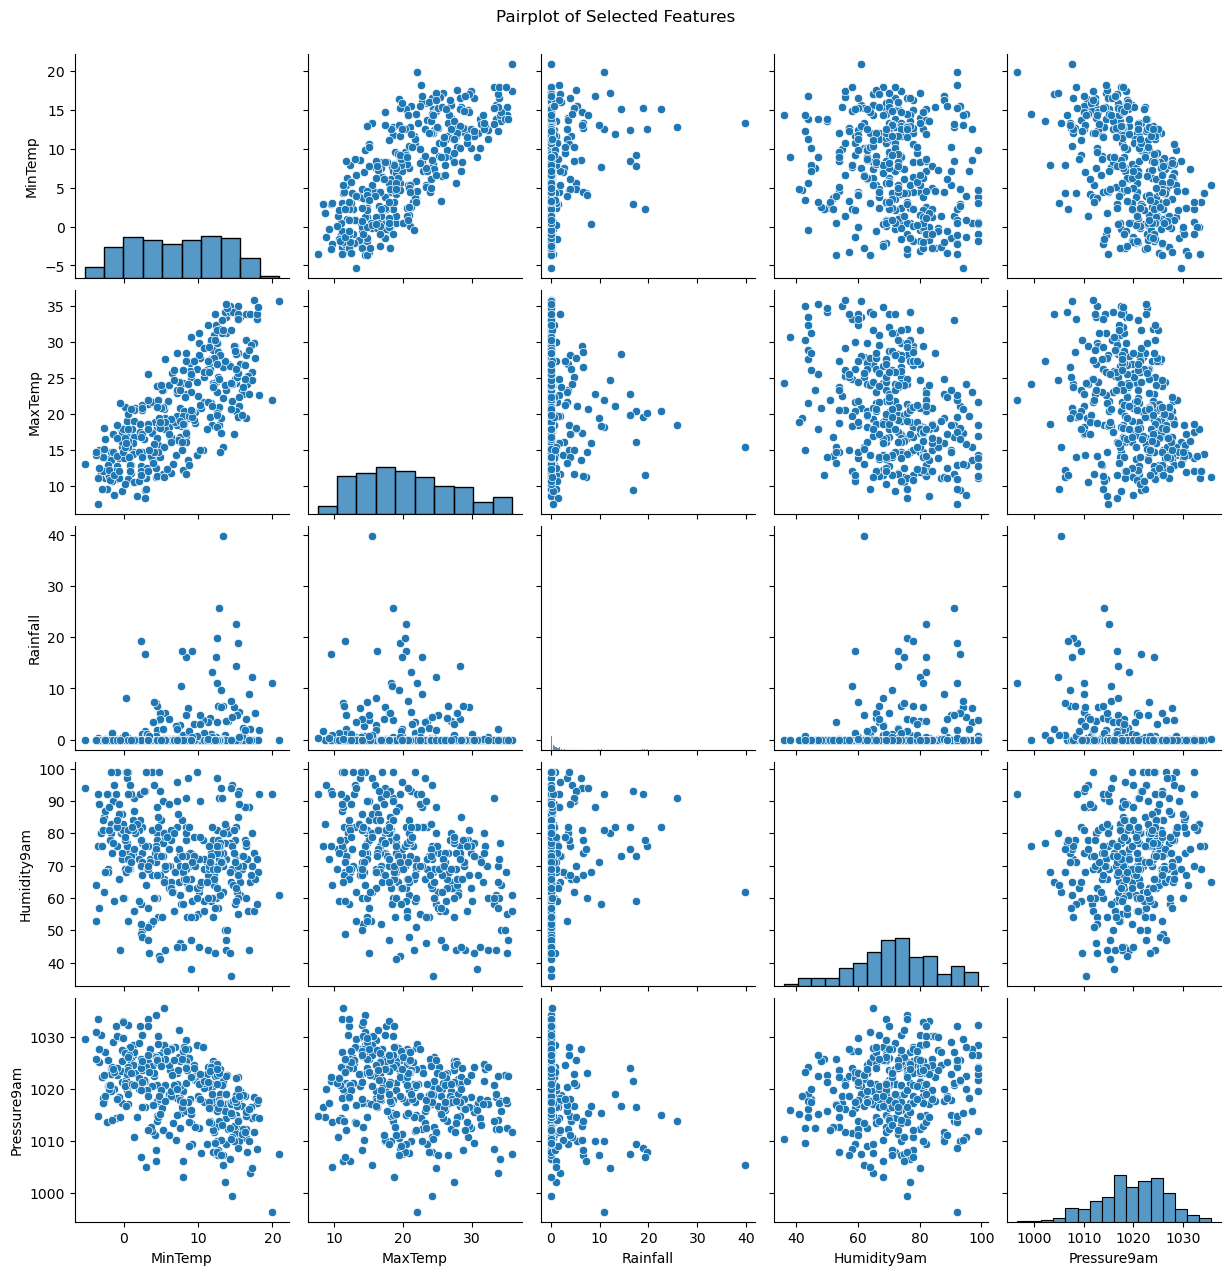

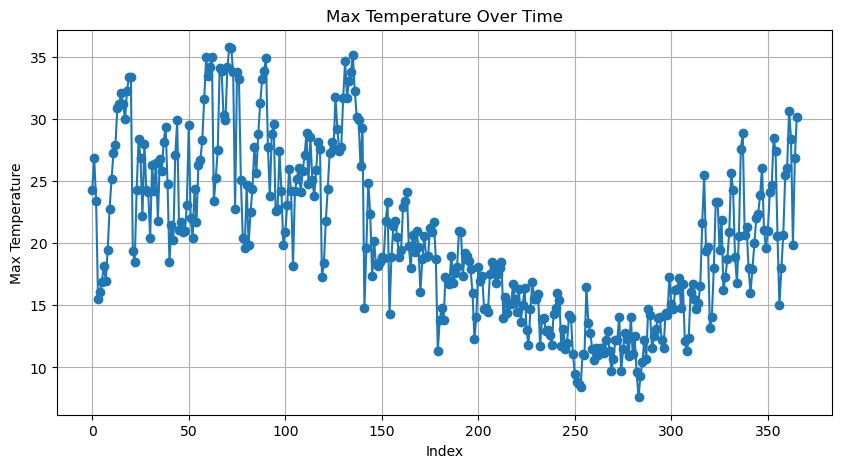

Mean Squared Error for Rainfall Prediction: 35.646352623003
Highest rainfall index: 3, Lowest rainfall index: 0


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step 1: Load the Data
df = pd.read_csv('weather.csv')

# Step 2: Data Exploration
print("Sample of the dataset:")
print(df.sample(5))
print("\nDataset Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Step 3: Data Visualization
sns.scatterplot(data=df, x='MinTemp', y='MaxTemp', hue='Rainfall')
plt.title('Scatter Plot of MinTemp vs MaxTemp colored by Rainfall')
plt.show()

# Step 5: Data Analysis
sns.histplot(df['Humidity9am'], bins=20, kde=True)
plt.title('Distribution of Humidity at 9 am')
plt.xlabel('Humidity at 9 am')
plt.ylabel('Frequency')
plt.show()

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

selected_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Pressure9am']
sns.pairplot(df[selected_features])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# Step 6: Data Visualization (Part 2)
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['MaxTemp'], marker='o')
plt.xlabel('Index')
plt.ylabel('Max Temperature')
plt.title('Max Temperature Over Time')
plt.grid(True)
plt.show()

# Step 7: Advanced Analysis (e.g., predict Rainfall)
# Prepare the data for prediction
X = df[['MinTemp', 'MaxTemp']]
y = df['Rainfall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions and calculate the Mean Squared Error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for Rainfall Prediction: {mse}')

# Step 8: Conclusions and Insights (analyze each term)
# Example: Identify the highest and lowest rainfall months
highest_rainfall_index = df['Rainfall'].idxmax()
lowest_rainfall_index = df['Rainfall'].idxmin()
print(f'Highest rainfall index: {highest_rainfall_index}, Lowest rainfall index: {lowest_rainfall_index}')